### Chi-square Distribution

The chi-square distribution is a probability distribution that arises in the context of hypothesis testing and statistical inference. It is a special case of the gamma distribution and is widely used in various statistical tests.

### Probability Density Function (PDF)
$[ f(x; k) = \frac{1}{2^{k/2} \Gamma(k/2)} x^{k/2 - 1} e^{-x/2} ]$

The probability density function (PDF) of the chi-square distribution is given by:

$[ f(x; k) = \frac{1}{2^{k/2} \Gamma(k/2)} x^{k/2 - 1} e^{-x/2} ]$

where:

- $(x)$ is a non-negative random variable.
- $(k)$ is the degrees of freedom parameter.
- $(\Gamma)$ is the gamma function.

In the chi-squared distribution, the degrees of freedom ($k$) are related to the number of categories minus 1. The distribution of the test statistic $(X^2)$ follows a chi-squared distribution with $(k)$ degrees of freedom.

The chi-squared test is commonly applied in:
- Significance testing for variance.
- Goodness-of-fit tests for categorical variables.
- Testing independence between two categorical variables using contingency tables.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, chi2_contingency

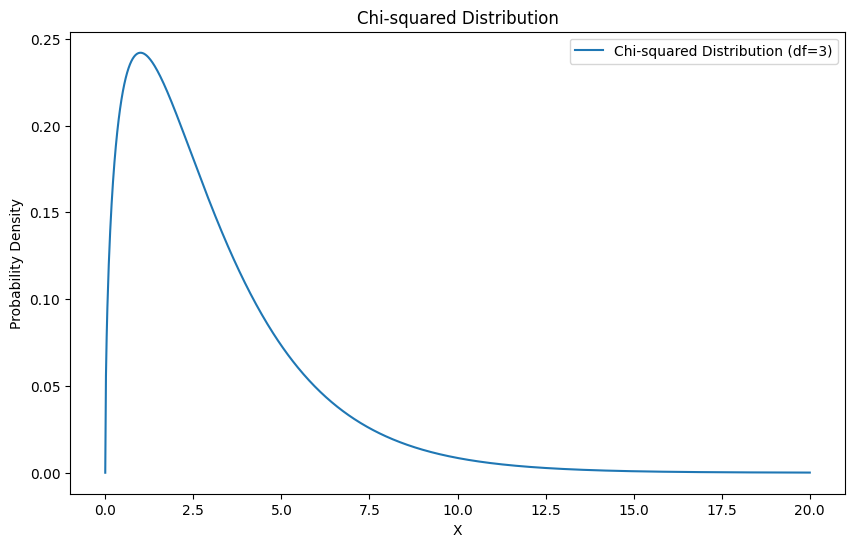

Chi-squared Statistic: 15.041666666666666
P-value: 0.00010516355403363098
Reject the null hypothesis: There is a significant relationship.


In [43]:
# Example 1: Plotting Chi-squared Distribution
df = 3  # Degrees of freedom
x = np.linspace(0, 20, 1000)
y = chi2.pdf(x, df)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f"Chi-squared Distribution (df={df})")
plt.title("Chi-squared Distribution")
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

# Example 2: Chi-squared Test (Contingency Table)
# Create a 2x2 contingency table
observed = np.array([[30, 10], [20, 40]])

# Perform Chi-squared test
chi2_stat, p_value, _, _ = chi2_contingency(observed)

print(f"Chi-squared Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship.")
else:
    print("Fail to reject the null hypothesis: No significant relationship.")

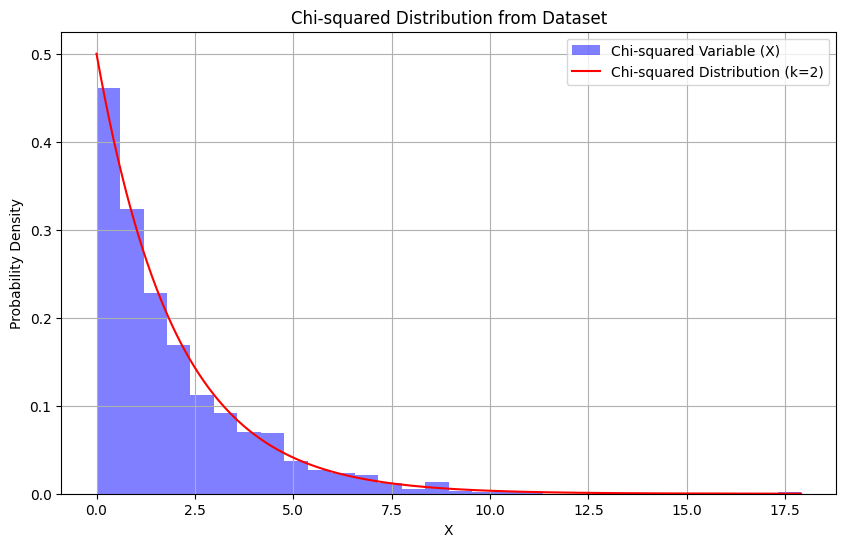

In [37]:
# Generate a larger dataset with random values
np.random.seed(42)
data = {
    "Variable_1": np.random.normal(0, 1, 1000),
    "Variable_2": np.random.normal(0, 1, 1000),
}
df = pd.DataFrame(data)

# Calculate chi-squared variable X for each row
df["X"] = df["Variable_1"] ** 2 + df["Variable_2"] ** 2

# Degrees of freedom for chi-squared distribution
degrees_of_freedom = 2  # You can adjust this based on your scenario

# Generate values for the chi-squared variable
x = np.linspace(0, df["X"].max(), 1000)
pdf_values = chi2.pdf(x, df=degrees_of_freedom)

# Plot the PDF
plt.figure(figsize=(10, 6))
plt.hist(
    df["X"],
    bins=30,
    density=True,
    alpha=0.5,
    color="blue",
    label="Chi-squared Variable (X)",
)
plt.plot(
    x, pdf_values, "r-", label=f"Chi-squared Distribution (k={degrees_of_freedom})"
)
plt.title("Chi-squared Distribution from Dataset")
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()